## Cancer Study

Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

 **Data Fields in the study**

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [1]:
# Standard
import numpy as np
import pandas as pd

In [2]:
# Stats
from scipy import stats

In [3]:
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from __future__ import division

In [4]:
# Load in the dataframe

# Since there are no column names, set the header equal to None, so that the first row does not become the column
#   names by default
cancer = pd.read_csv("/home/gatewj/cancerStudy/cancer.csv", header = None)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Set the column names

cancer.columns = ["id","ClumpThickness","UniformityofCellSize","UniformityofCellShape","MarginalAdhesion","SingleEpithelialCellSize", 
"Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class(2 for benign, 4 for malignant)"]

In [6]:
cancer.head()

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class(2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# Check the len of the data set
len(cancer["id"])

699

In [8]:
# To check to see if there are any null values I will use the describe function
cancer.describe()

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bland Chromatin,Normal Nucleoli,Mitoses,"Class(2 for benign, 4 for malignant)"
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
cancer.isnull()

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class(2 for benign, 4 for malignant)"
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Get overall information on dataframe

cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
id                                      699 non-null int64
ClumpThickness                          699 non-null int64
UniformityofCellSize                    699 non-null int64
UniformityofCellShape                   699 non-null int64
MarginalAdhesion                        699 non-null int64
SingleEpithelialCellSize                699 non-null int64
Bare Nuclei                             699 non-null object
Bland Chromatin                         699 non-null int64
Normal Nucleoli                         699 non-null int64
Mitoses                                 699 non-null int64
Class(2 for benign, 4 for malignant)    699 non-null int64
dtypes: int64(10), object(1)

In [11]:
# Checking to see how many values are '?' in the column 'Bare Nuclei'

count = 0

for value in range(len(cancer['Bare Nuclei'])):
    if cancer['Bare Nuclei'][value] == '?':
        count = count + 1

print count    

16


In [12]:
## Since there are only 16 values which have the question mark, I have decided to drop those rows

cancer = cancer[cancer['Bare Nuclei'] != '?']

In [13]:
# checking to make sure I drop the correct number of cells

len(cancer), 699-16

(683, 683)

In [14]:
# Check for duplicates
len(cancer[cancer.duplicated('id')])

53

In [15]:
# Exploring duplicates. Questions: What if a patient went to a doctor twice and the cancer got worse? Still have the same
# id.

cancer[cancer.duplicated('id')]

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class(2 for benign, 4 for malignant)"
9,1033078,4,2,1,1,2,1,2,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2
109,1171710,6,5,4,4,3,9,7,8,3,4
116,1173347,8,3,3,1,2,2,3,2,1,2
121,1174057,4,2,1,1,2,2,3,1,1,2
195,1212422,4,1,1,1,2,1,3,1,1,2
208,1218860,1,1,1,1,1,1,3,1,1,2
252,1017023,6,3,3,5,3,10,3,5,3,2
253,1100524,6,10,10,2,8,10,7,3,3,4


In [16]:
# Drop duplicates
cancer = cancer.drop_duplicates('id')

In [17]:
## Number of records I am expecting after dropped records

len(cancer), 683-53

(630, 630)

In [18]:
cancer_groups = cancer.groupby("Class(2 for benign, 4 for malignant)")

In [19]:
cancer_groups.describe()

id  ClumpThickness  \
Class(2 for benign, 4 for malignant)                                          
2                                    count       400.000000      400.000000   
                                     mean    1120700.472500        2.927500   
                                     std      763619.781403        1.655020   
                                     min      128059.000000        1.000000   
                                     25%     1012305.000000        1.000000   
                                     50%     1180677.000000        3.000000   
                                     75%     1257689.750000        4.000000   
                                     max    13454352.000000        8.000000   
4                                    count       230.000000      230.000000   
                                     mean    1007531.443478        7.226087   
                                     std      323726.825165        2.438988   
                                     min       63375.000000        1.000000   
                                     25%      833795.250000        5.000000   
                                     50%     1147723.500000        8.000000   
                                     75%     1222818.000000       10.000000   
                                     max     1371026.000000       10.000000   

                                            UniformityofCellSize  \
Class(2 for benign, 4 for malignant)                               
2                                    count            400.000000   
                                     mean               1.287500   
                                     std                0.788288   
                                     min                1.000000   
                                     25%                1.000000   
                                     50%                1.000000   
                                     75%                1.000000   
                                     max                8.000000   
4                                    count            230.000000   
                                     mean               6.521739   
                                     std                2.716110   
                                     min                1.000000   
                                     25%                4.000000   
                                     50%                6.000000   
                                     75%               10.000000   
                                     max               10.000000   

                                            UniformityofCellShape  \
Class(2 for benign, 4 for malignant)                                
2                                    count             400.000000   
                                     mean                1.412500   
                                     std                 0.943169   
                                     min                 1.000000   
                                     25%                 1.000000   
                                     50%                 1.000000   
                                     75%                 1.000000   
                                     max                 8.000000   
4                                    count             230.000000   
                                     mean                6.517391   
                                     std                 2.569072   
                                     min                 1.000000   
                                     25%                 4.000000   
                                     50%                 6.000000   
                                     75%                 9.000000   
                                     max                10.000000   

                                            MarginalAdhesion  \
Class(2 for benign, 4 for malignant)                           
2                                    c

{2: {'boxes': [<matplotlib.lines.Line2D at 0x7f875f4d5bd0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f875f4d53d0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f875f4e9410>,
  'medians': [<matplotlib.lines.Line2D at 0x7f875f4d5fd0>,
  'whiskers': [<matplotlib.lines.Line2D at 0x7f875f4bfcd0>,
   <matplotlib.lines.Line2D at 0x7f875f5acbd0>]},
 4: {'boxes': [<matplotlib.lines.Line2D at 0x7f875b53e9d0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f875b4d23d0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f875b4dd450>,
  'medians': [<matplotlib.lines.Line2D at 0x7f875b4d2dd0>,
  'whiskers': [<matplotlib.lines.Line2D at 0x7f875b4c9c50>,
   <matplotlib.lines.Line2D at 0x7f875b3ead50>]}}

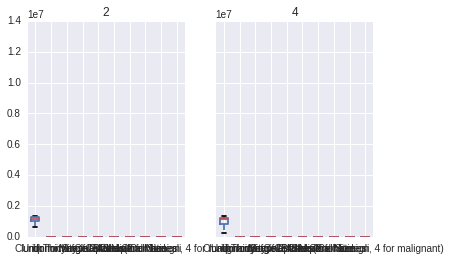

In [20]:
# Trying to create boxplots, did not work.

cancer_groups[['ClumpThickness','UniformityofCellSize']].boxplot()

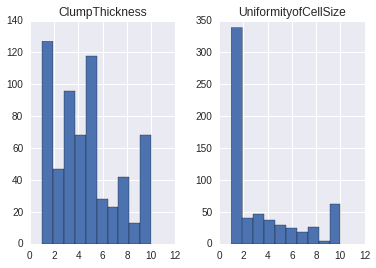

In [21]:
## Boxplots
#plt.ticklabel_format(useOffset=False) 
cancer[['ClumpThickness','UniformityofCellSize']].hist()
plt.ticklabel_format(useOffset=False) 

Class(2 for benign, 4 for malignant)
2                                       Axes(0.125,0.125;0.775x0.775)
4                                       Axes(0.125,0.125;0.775x0.775)
dtype: object

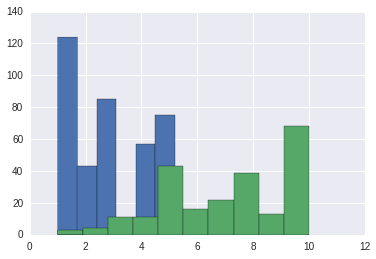

In [22]:
cancer_groups['ClumpThickness'].hist()
#plt.ticklabel_format(useOffset=False) 

Class(2 for benign, 4 for malignant)
2                                       Axes(0.125,0.125;0.775x0.775)
4                                       Axes(0.125,0.125;0.775x0.775)
dtype: object

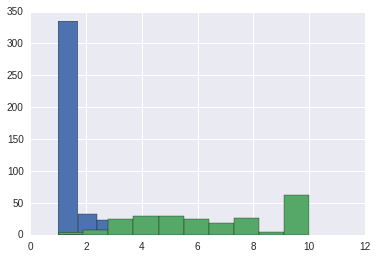

In [23]:
cancer_groups['UniformityofCellSize'].hist()

In [24]:
cancer.columns

Index([u'id', u'ClumpThickness', u'UniformityofCellSize', u'UniformityofCellShape', u'MarginalAdhesion', u'SingleEpithelialCellSize', u'Bare Nuclei', u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses', u'Class(2 for benign, 4 for malignant)'], dtype='object')

Class(2 for benign, 4 for malignant)
2                                       Axes(0.125,0.125;0.775x0.775)
4                                       Axes(0.125,0.125;0.775x0.775)
dtype: object

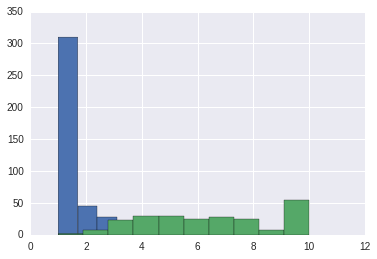

In [25]:
cancer_groups['UniformityofCellShape'].hist()
#cancer_groups.plot(kind = "hist")

Class(2 for benign, 4 for malignant)
2                                       Axes(0.125,0.125;0.775x0.775)
4                                       Axes(0.125,0.125;0.775x0.775)
dtype: object

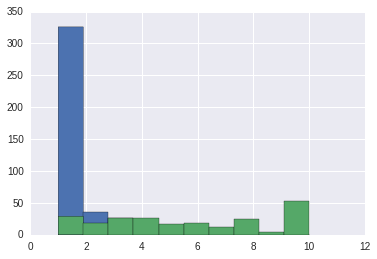

In [26]:
cancer_groups['MarginalAdhesion'].hist()

array([<matplotlib.axes.AxesSubplot object at 0x7f875aeaead0>,
       <matplotlib.axes.AxesSubplot object at 0x7f875ad90890>], dtype=object)

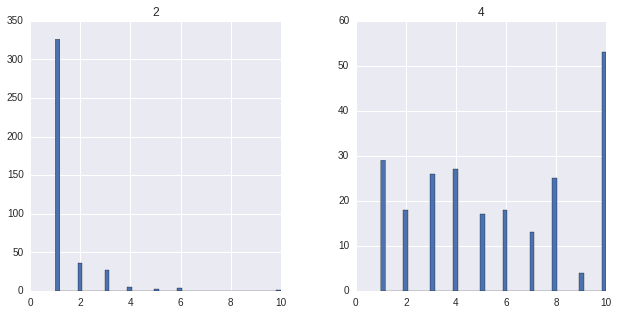

In [27]:
cancer['MarginalAdhesion'].hist(by=cancer['Class(2 for benign, 4 for malignant)'])

array([<matplotlib.axes.AxesSubplot object at 0x7f875adb3190>,
       <matplotlib.axes.AxesSubplot object at 0x7f875ab75650>], dtype=object)

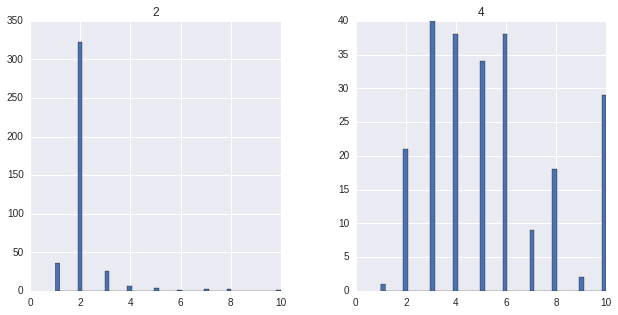

In [28]:
cancer['SingleEpithelialCellSize'].hist(by=cancer['Class(2 for benign, 4 for malignant)'])

In [29]:
#cancer['Bare Nuclei'].hist()#.hist(by=cancer['Class(2 for benign, 4 for malignant)'])

array([<matplotlib.axes.AxesSubplot object at 0x7f875ab22350>,
       <matplotlib.axes.AxesSubplot object at 0x7f875a6a25d0>], dtype=object)

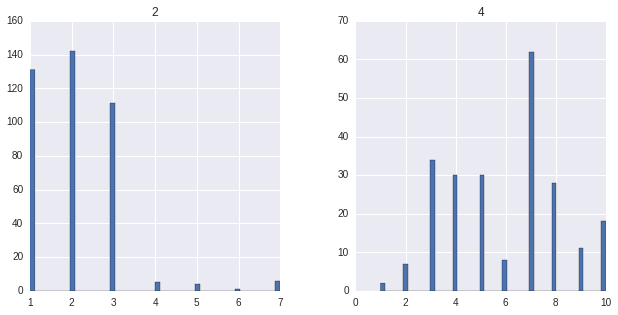

In [30]:
cancer['Bland Chromatin'].hist(by=cancer['Class(2 for benign, 4 for malignant)'])

array([<matplotlib.axes.AxesSubplot object at 0x7f875a6955d0>,
       <matplotlib.axes.AxesSubplot object at 0x7f875a310e90>], dtype=object)

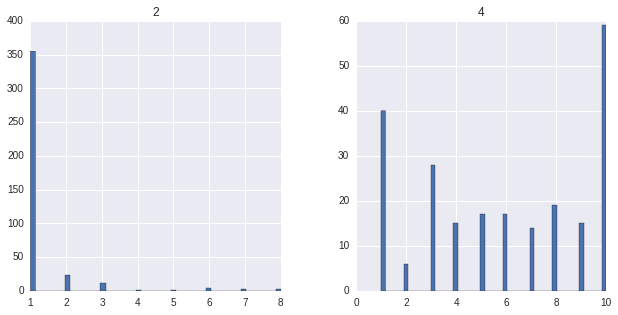

In [31]:
cancer['Normal Nucleoli'].hist(by=cancer['Class(2 for benign, 4 for malignant)'])

array([<matplotlib.axes.AxesSubplot object at 0x7f875accbd50>,
       <matplotlib.axes.AxesSubplot object at 0x7f8759f86790>], dtype=object)

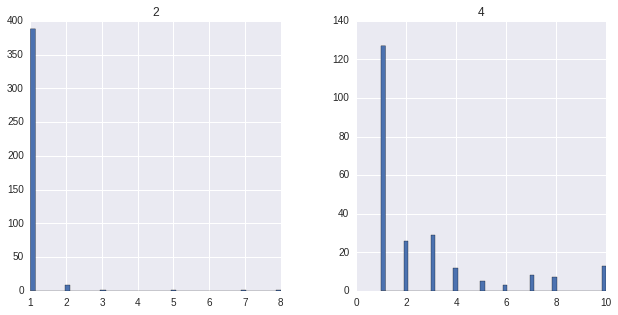

In [32]:
cancer['Mitoses'].hist(by=cancer['Class(2 for benign, 4 for malignant)'])

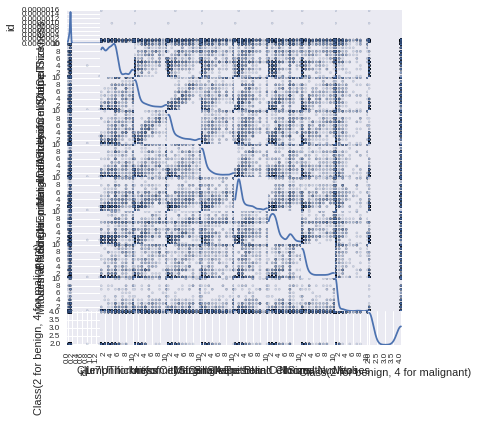

In [33]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cancer, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.ticklabel_format(useOffset=False) 

In [34]:
cancer.columns

Index([u'id', u'ClumpThickness', u'UniformityofCellSize', u'UniformityofCellShape', u'MarginalAdhesion', u'SingleEpithelialCellSize', u'Bare Nuclei', u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses', u'Class(2 for benign, 4 for malignant)'], dtype='object')

array([[<matplotlib.axes.AxesSubplot object at 0x7f8759d4bc90>,
        <matplotlib.axes.AxesSubplot object at 0x7f875750aa50>]], dtype=object)

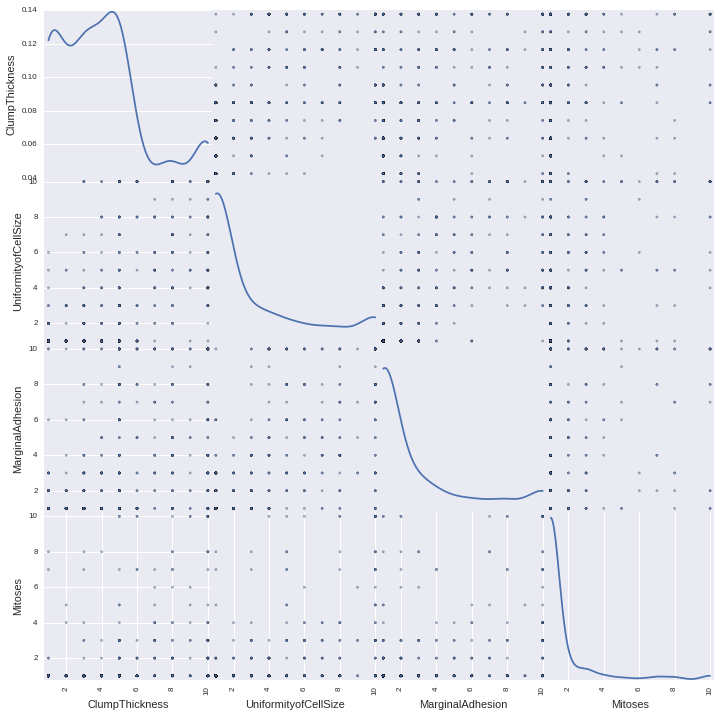

In [35]:
col = ['ClumpThickness','UniformityofCellSize','MarginalAdhesion','Mitoses']
pd.scatter_matrix(cancer[col],diagonal='kde', figsize = (12,12))

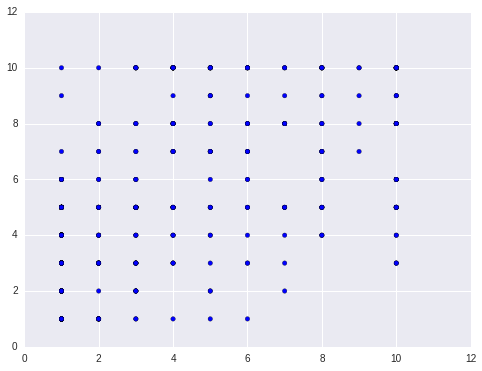

In [36]:
plt.figure(figsize=(8, 6), dpi=80)
#plt.subplot(1, 1, 1)
plt.scatter(cancer['UniformityofCellSize'], cancer['ClumpThickness'])

In [37]:
# Create check function
def benign_check(x):
    if x == 2:
        return 0
    else:
        return 1

# Apply to DataFrame
cancer['Had_Cancer'] = cancer['Class(2 for benign, 4 for malignant)'].apply(benign_check)

In [38]:
cancer.head()

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class(2 for benign, 4 for malignant)",Had_Cancer
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0


In [39]:
cancer.groupby('Class(2 for benign, 4 for malignant)').mean()

,id,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bland Chromatin,Normal Nucleoli,Mitoses,Had_Cancer
"Class(2 for benign, 4 for malignant)",,,,,,,,,,
2,1120700.472500,2.927500,1.287500,1.412500,1.342500,2.12000,2.090000,1.262500,1.067500,0
4,1007531.443478,7.226087,6.521739,6.517391,5.656522,5.33913,5.969565,5.904348,2.604348,1


In [40]:
cancer.columns

Index([u'id', u'ClumpThickness', u'UniformityofCellSize', u'UniformityofCellShape', u'MarginalAdhesion', u'SingleEpithelialCellSize', u'Bare Nuclei', u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses', u'Class(2 for benign, 4 for malignant)', u'Had_Cancer'], dtype='object')

In [41]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].convert_objects(convert_numeric=True)

In [42]:
cancer_df = cancer[['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
                    'SingleEpithelialCellSize','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]

In [43]:
cancer_df.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [44]:
# Set Y as Target class, Had Cancer
Y = cancer.Had_Cancer

# Preview
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Had_Cancer, dtype: int64

In [45]:
# In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. 
#     Numpy has a built in method for this called ravel. Let's use it!

# Flatten array
Y = np.ravel(Y)

In [46]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [47]:
## Logistic Regression
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(cancer_df,Y)

# Check our accuracy
log_model.score(cancer_df,Y)

0.96825396825396826

In [48]:
# The percentage of patients who had cancer  #NUll Rate Error

Y.mean()

0.36507936507936506

In [49]:
1-Y.mean()

0.63492063492063489

In [50]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(cancer_df.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,ClumpThickness,[0.258245494592]
1,UniformityofCellSize,[0.259185387975]
2,UniformityofCellShape,[0.227196035455]
3,MarginalAdhesion,[0.194578310889]
4,SingleEpithelialCellSize,[-0.078494898608]
5,Bare Nuclei,[0.390312673454]
6,Bland Chromatin,[0.119822860271]
7,Normal Nucleoli,[0.186229760619]
8,Mitoses,[0.21209384478]


In [51]:
# Testing and Training Data Sets
X_train, X_test, Y_train, Y_test = train_test_split(cancer_df, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.96835443038


In [53]:
#clf = LogisticRegression(C=1e100)
#clf.fit(cancer_df,Y)
#print clf.coef_
#print np.exp(clf.coef_)
#print clf.score(cancer_df, Y)

In [54]:
#clf.fit(cancer_df,Y)

In [55]:
clf2 = LogisticRegression(penalty='l1', C=1e100).fit(cancer_df, Y)

In [56]:
print clf2.coef_

[[ 0.60166612  0.14345048  0.21183063  0.386542    0.05600145  0.47204731
   0.3802788   0.20711518  0.68441771]]


In [57]:
np.exp(clf2.coef_)

array([[ 1.82515719,  1.15424966,  1.23593854,  1.47188222,  1.05759922,
         1.60327323,  1.46269234,  1.23012425,  1.98261703]])

In [58]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(cancer_df, Y, test_size=0.4, random_state=0) 
clf3 = LogisticRegression(penalty='l1', C=1e100).fit(X_train, y_train)
clf3.score(X_test,y_test)

0.97619047619047616

In [59]:
kf = cross_validation.KFold(n=len(cancer_df), n_folds=5, shuffle=True, random_state=1234)

for train, test in kf:
    clf4 = LogisticRegression(penalty='l1', C=1e100).fit(cancer_df.iloc[train], Y[train])
    # Score for most classifiers by default returns accuracy.
    print clf4.score(cancer_df.iloc[test],Y[test])  #clf4.coef_

0.984126984127
0.960317460317
0.984126984127
0.97619047619
0.952380952381


## Building A Regression Tree

In [60]:
# select feature columns
feature_cols = cancer_df

# define X (features) and y (response)
X2 = feature_cols
Y2 = cancer.Had_Cancer

In [61]:
# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X2, Y2)

In [62]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3,random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [63]:
# make predictions
preds = treeclf.predict(X_test)

# print predictions and actual values
print preds[11:20]
print y_test[11:20]

[0 0 0 1 1 0 1 0 1]
105    1
291    0
554    0
592    1
128    1
540    0
155    1
676    0
215    1
Name: Had_Cancer, dtype: int64


0.21048467276349228

In [65]:
# create a Graphviz file
from sklearn.tree import export_graphviz

In [66]:
features_col = ['ClumpThickness', 'UniformityofCellSize','UniformityofCellShape','MarginalAdhesion', 
            'SingleEpithelialCellSize', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']

In [67]:
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [68]:
#visualize_tree(treeclf, features_col)

In [69]:
X2.columns

Index([u'ClumpThickness', u'UniformityofCellSize', u'UniformityofCellShape', u'MarginalAdhesion', u'SingleEpithelialCellSize', u'Bare Nuclei', u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses'], dtype='object')

In [70]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,ClumpThickness,0.037682
1,UniformityofCellSize,0.814006
2,UniformityofCellShape,0.000000
3,MarginalAdhesion,0.004815
4,SingleEpithelialCellSize,0.000000
5,Bare Nuclei,0.123333
6,Bland Chromatin,0.000000
7,Normal Nucleoli,0.020164
8,Mitoses,0.000000


In [71]:
# Compute the confusion matrix
conf = metrics.confusion_matrix(Y2, treeclf.predict(X2))
print conf

[[387  13]
 [  8 222]]


fpr 0.0325
tpr 0.965217391304
precision 0.944680851064
accuracy 0.966666666667


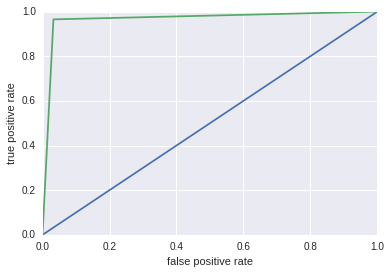

In [72]:
# Check to see what the roc curve looks like.

print 'fpr', metrics.roc_curve(Y2, treeclf.predict(X2))[0][1] #fpr
print 'tpr', metrics.roc_curve(Y2, treeclf.predict(X2))[1][1] #tpr
print 'precision', metrics.precision_score(Y2, treeclf.predict(X2))
print 'accuracy', metrics.accuracy_score(Y2, treeclf.predict(X2))

roc = metrics.roc_curve(Y2, treeclf.predict(X2))
plt.figure()

plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')